## **4.1. Работа с датасетом "house price"**

1.1 Скачать данные по ссылке [kc-house-data](https://gbcdn.mrgcdn.ru/uploads/asset/5349842/attachment/16ab1213a48b859e6e5e7407e10933ff.csv) и [laptop_price](https://gbcdn.mrgcdn.ru/uploads/asset/5349844/attachment/3b40712030489b6656a525045f3b0ed1.csv)

1.2 Изучите стоимости недвижимости

1.3 Изучите распределение квадратуры жилой площади

1.4 Изучите распределение года постройки

- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы
***

Импортируем нужные библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Считаем скаченный файл

In [2]:
df = pd.read_csv('kc-house-data.csv',encoding='cp1251')

### 1.2 Изучите стоимости недвижимости

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

- **`id`** - Уникальный ID для каждого дома
    - `date` - Дата продажи дома
    - `price` - Стоимость продажи дома
    - `bedrooms` - Кол-во спален
    - `bathrooms` - Кол-во ванных комнат (0.5 - туалет без душа)
    - `sqft_living` - Кв. метры жилые
    - `sqft_lot` - Кв. метры общие
    - `floors` - Кол-во этажей
    - `waterfront` - Есть набережная или нет
    - `view` - Значение от 0 до 4 насколько хороший вид
    - `condition` - Значение от 1 до 5 насколько хорошее состояние
    - `grade` - Значение от 1 до 13, где 1-3 плохая конструкция здания и дизайн, 7 - средний уровень конструкции и дизайна, 11-13 - высокое качество конструкции и дизайна
    - `sqft_above` - Кв. метры дома, которые находятся выше земли
    - `sqft_basement` - Кв. метры дома, которые находятся ниже земли
    - `yr_built` - Год постройки дома
    - `yr_renovated` - Год ремонта дома
    - `zipcode` - Индекс
    - `lat` - Широта
    - `long` - Долгота
    - `sqft_living15` - Кв. метры жилой площади у 15 соседей
    - `sqft_lot15` - Кв. метры общей площади у 15 соседей


*Учитывая наличие большого количества цифр в числах, настроим отображение чисел с плавающей точкой до 2-х знаков*

In [5]:
pd.options.display.float_format = '{:.2f}'.format

Посмотрим первичную статистику

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


Построим гистограмму по стоимости недвижимости

Text(0.5, 1.0, 'Стоимость недвижимости')

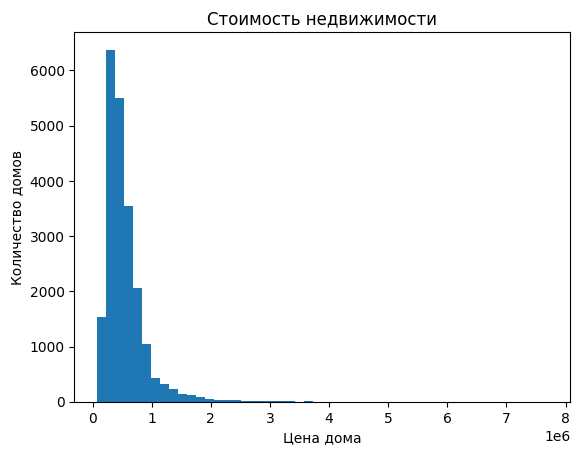

In [7]:
plt.figure()
plt.hist(df['price'],bins= 50)
plt.xlabel('Цена дома')
plt.ylabel('Количество домов')
plt.title('Стоимость недвижимости')

Построим график с усами по стоимости недвижимости

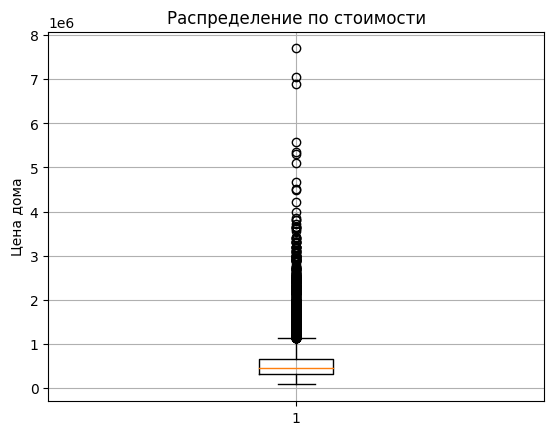

In [8]:
plt.figure() # создаем фигуру
plt.boxplot(df['price']) # для построения графика с усами, полноценно извлекаем признак. 
plt.ylabel('Цена дома') # обозначение оси ординат
plt.title('Распределение по стоимости') # название гисторгаммы
plt.grid()

Посмотрим насколько хорошее состояние домов, отраженных на гистограмме

<Axes: xlabel='price', ylabel='Count'>

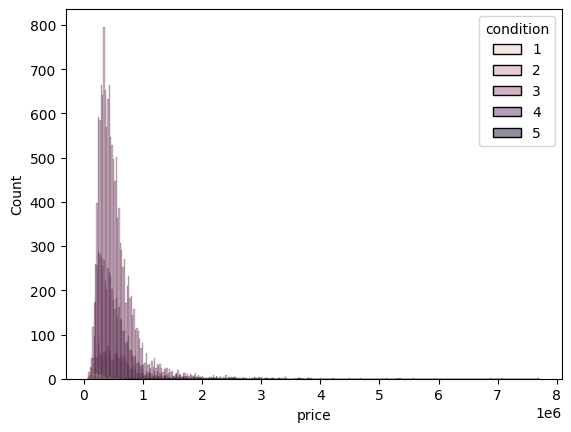

In [9]:
sns.histplot(data=df, x="price", hue="condition")

### 1.3 Изучите распределение квадратуры жилой площади

Построим гистограмму распределения квадратуры жилой площади

Text(0.5, 1.0, 'Распределение квадратуры жилой площади')

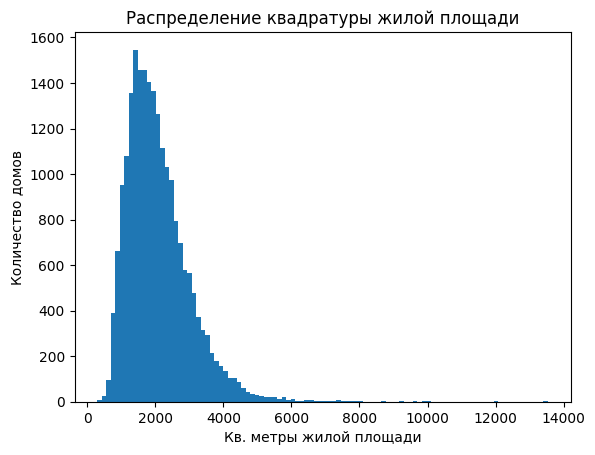

In [10]:
plt.figure()
plt.hist(df['sqft_living'],bins= 100)
plt.xlabel('Кв. метры жилой площади')
plt.ylabel('Количество домов')
plt.title('Распределение квадратуры жилой площади')

### 1.4 Изучите распределение года постройки

Построим гистограмму распределения по году постройки

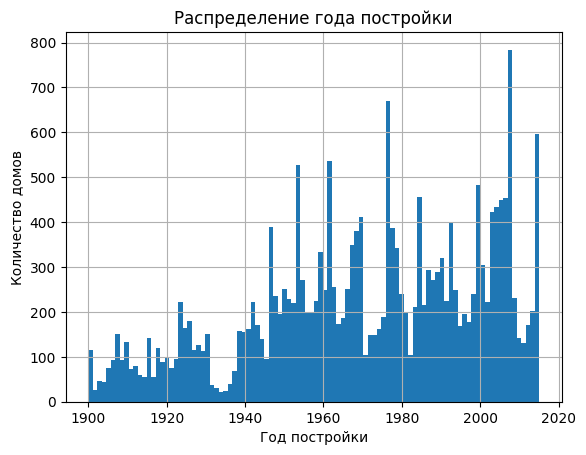

In [11]:
plt.figure()
plt.hist(df['yr_built'],bins= 100)
plt.xlabel('Год постройки')
plt.ylabel('Количество домов')
plt.title('Распределение года постройки')
plt.grid()

<span style="color:#00FFFF">
<i>Сделаем вывод:</i> 
</br>- Большинство домов представлены в ценовой категории до 1000000.00, средняя стоимость 450000.00.
</br>- Жилая площать в большинстве представлена от 1000 до 3000 кв.м.
</br>- По годам постройки большинство моложе 1945 года, также втречаются года с высокой количественной затройкой.
</span>